# Trabajo Práctico 2 v.2023

In [1]:
import numpy as np
import scipy as sps
import matplotlib.pyplot as plt
%matplotlib inline


### Ej: 1: Señal de electroencefalograma:

La señal que se encuentra en el archivo necg.txt corresponde a un registro de la actividad electrica del corazón de un paciente, esta señal esta digitalizada con una razón de 500 muestras por segundo. Este registro se encuentra contaminado con varias fuentes de ruido.

**a) Analice el espectro de dicha señal e indique que fuentes de ruido podrían estar afectando la señal. (caractericelo en terminos de la frecuencia).**

**b) Utilice la TDF para filtrar la señal (genere respuesta en frecuencia ideal, en forma de mascara, y filtre con ella el espectro de la señal y obtenga finalmene la función en el tiempo filtrada).**

**c) Calcule la frecuencia cardiaca, con la señal obtenida.**

**d) Diseñe filtro FIR por el metodo de la ventana que desempeñe la tarea de filtrar la sañal registrada.**

**e) Seleccióne un numero apropiado de componentes y compare el filtro con la mascara del punto b)**

**f) Indique la formula de la ecuación en diferencias a la que responde.**





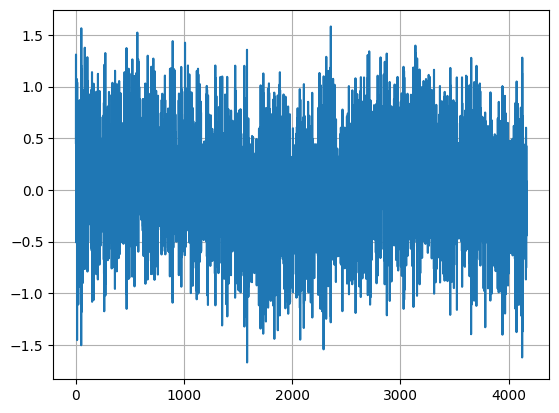

In [177]:
x=np.loadtxt("noisy_ecg.txt")
plt.plot(x)
plt.grid()

#### a) Analice el espectro de dicha señal e indique que fuentes de ruido podrían estar afectando la señal. (caractericelo en terminos de la frecuencia).

aquí podemos crear una función que no sirva siempre o casi siempre:

In [178]:

def plot_spectro(x,fs,n=2048,half=False,db=False,dc_filt=False):
     
    
    if dc_filt:
        X=np.fft.fft(x-np.mean(x),n)
    else:
        X=np.fft.fft(x,n)
    
    
    freq=np.linspace(0,fs,len(X))
    
    if db:
        Xabs=20*np.log10(np.abs(X))
    else:
        Xabs=np.abs(X)
        
    plt.plot(freq,Xabs)
    
    if db:
        plt.ylabel('dB')
    else:
        plt.ylabel('$|H(e^{\omega j})|$')
    
    plt.grid()
    plt.xlabel('f [Hz]')
    

    
    if half:
        plt.xlim(0,fs/2)
    
    return Xabs,freq
    

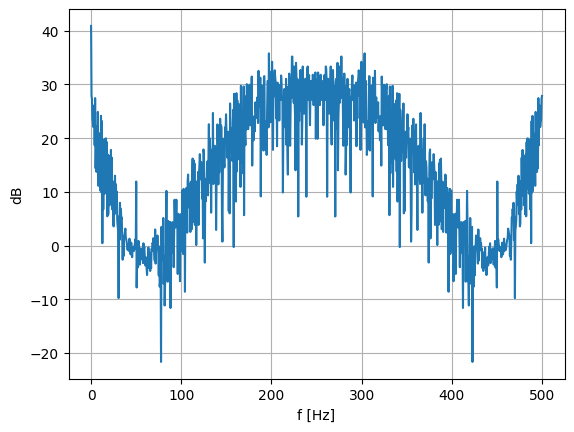

In [179]:
Xabs,freq=plot_spectro(x,fs=500,n=1000,half=False,db=True,dc_filt=True)
plt.show()

#### OPCION mas lineal:
a) Analice el espectro de dicha señal e indique que fuentes de ruido podrían estar afectando la señal. (caractericelo en terminos de la frecuencia).

Text(0, 0.5, 'X[f] [dB]')

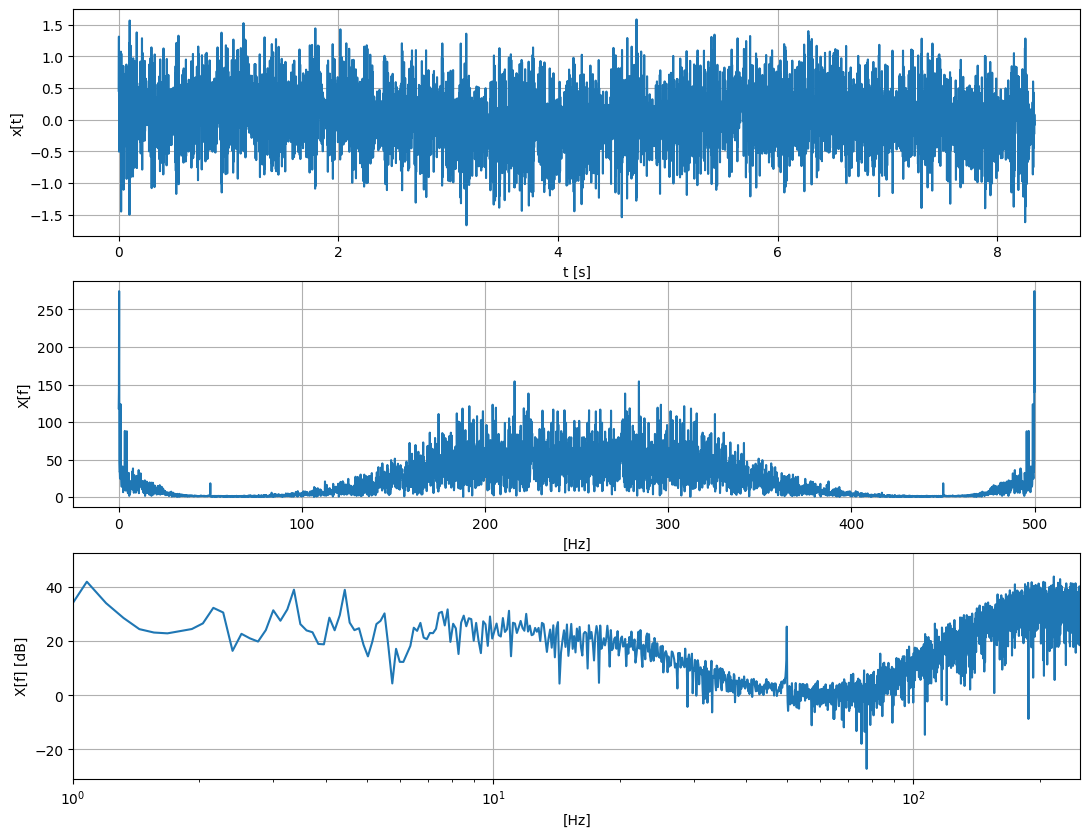

In [180]:
fig,ax=plt.subplots(3,figsize=(13,10))

#definimos datos:

fs=500
t=np.linspace(0,len(x)/fs,len(x))
ax[0].plot(t,x)
ax[0].grid()
ax[0].set()
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('x[t]')

# obtencion de las componentes meidante la fft

X=np.fft.fft(x)

#X=np.fft.fft(x,n=1000000)


freq=np.linspace(0,fs,len(X)) #escalado muestras a frecuencia
ax[1].plot(freq,np.abs(X))
ax[1].grid()
ax[1].set_xlabel('[Hz]')
ax[1].set_ylabel('X[f]')

# si quremoso la mitad del espectro y en db:

ax[2].plot(freq,20*np.log10(np.abs(X)))
ax[2].set_xlim(1,fs/2)
ax[2].set_xscale('log')
ax[2].grid()
ax[2].set_xlabel('[Hz]')
ax[2].set_ylabel('X[f] [dB]')


b) Utilice la TDF para filtrar la señal (genere respuesta en frecuencia ideal, en forma de mascara, y filtre con ella el espectro de la señal y obtenga finalmene la función en el tiempo filtrada).

In [82]:
def easy_graph(x,y,ax,title,labelx='f[hz]',labely='X[f]'):
    ax.plot(x,y)
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel('[Hz]')
    ax.set_ylabel('X[f]')
    
def apply_mask(X,mask):
    
    x=np.fft.ifft(X*mask)
    
    t=np.linspace(0,len(x)/fs,len(x))
        
    return np.real(x),t

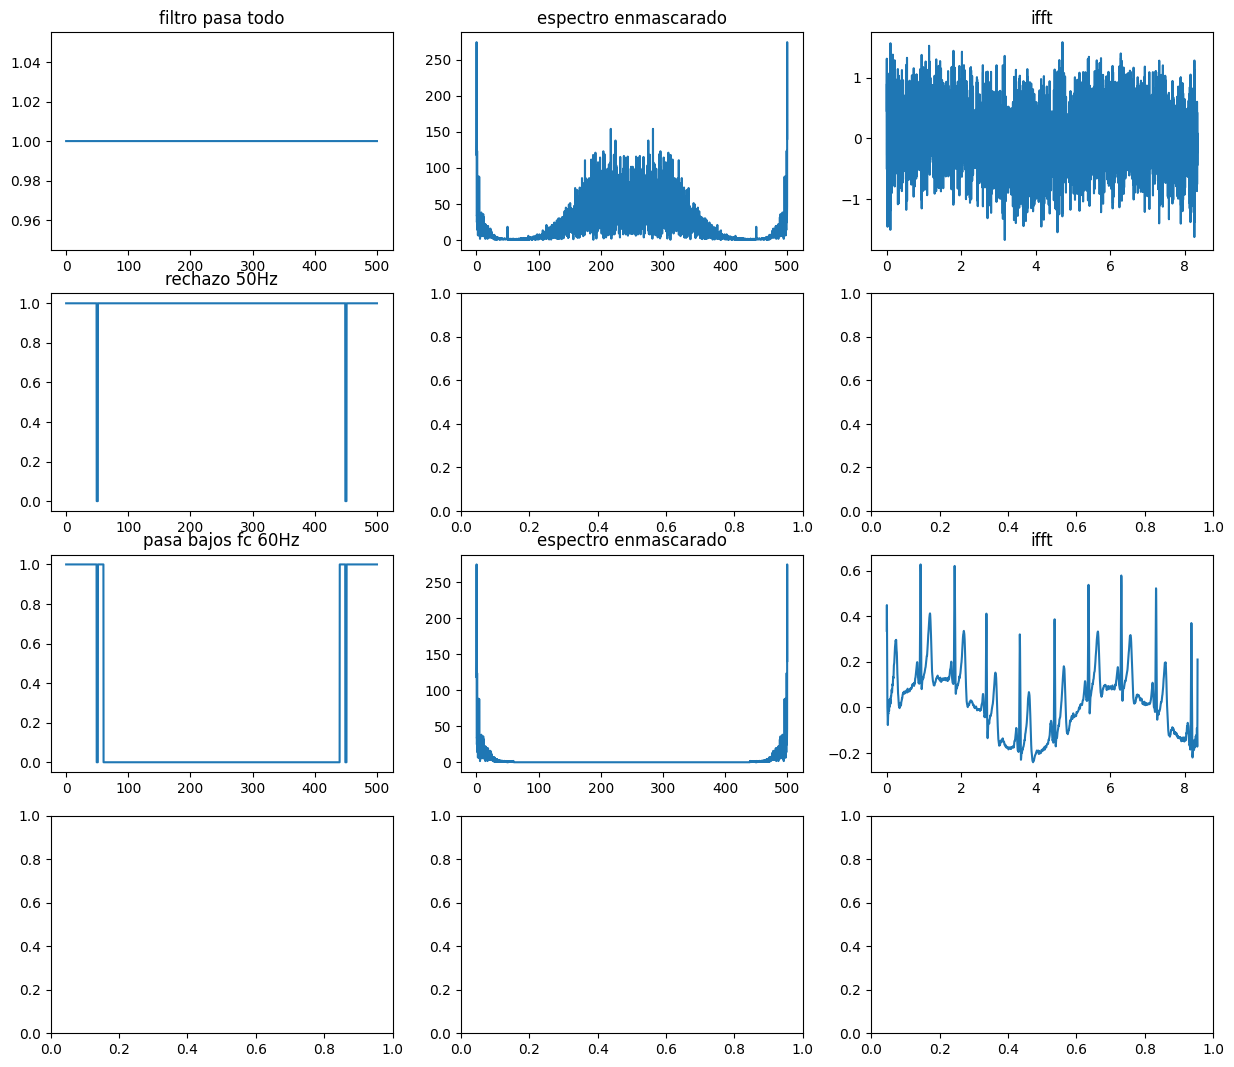

In [87]:
# podemos aplicar los filtors de a 1 o en simultaneo, arememos la respuesta en frecuencia de nuestros filtros:
fig, ax=plt.subplots(4,3, figsize=(15,13))


X=np.fft.fft(x)
freq=np.linspace(0,fs,len(X))


#==================================================================================

mask=np.ones(len(X)) # nuestra mascara tiene que tener la cantitad de componentes que tiene la FFT
ax[0,0].plot(freq,mask)
ax[0,0].set_title('filtro pasa todo')


# graficamos el espectro enmascarado
ax[0,1].plot(freq,np.abs(X*mask))
ax[0,1].set_title('espectro enmascarado')


# antitransformamos
xmask,t=apply_mask(X,mask) # aca usamos una funcion que creamos para evitar repetir codigo

ax[0,2].plot(t,xmask)
ax[0,2].set_title('ifft')

#==================================================================================                  
#filtrado 50Hz 
mask[np.where((freq>49) & (freq<51))]=0
mask[np.where((freq>500-51) & (freq<500-49))]=0

ax[1,0].plot(freq,mask)
ax[1,0].set_title('rechazo 50Hz')




#completen



#==================================================================================  

#filtrado lowpass
f_low_pass=60
mask[np.where((freq>f_low_pass) & (freq<500-f_low_pass))]=0

ax[2,0].plot(freq,mask)
ax[2,0].set_title('pasa bajos fc 60Hz')


# graficamos el espectro enmascarado
ax[2,1].plot(freq,np.abs(X*mask))
ax[2,1].set_title('espectro enmascarado')


# antitransformamos
xmask,t=apply_mask(X,mask) # aca usamos una funcion que creamos para evitar repetir codigo

ax[2,2].plot(t,xmask)
ax[2,2].set_title('ifft')


#==================================================================================  

#filtrado lowpass

f_low=2
mask[np.where((freq<f_low))]=0
mask[np.where((freq>500-f_low))]=0




#### d) Diseñe filtro FIR por el metodo de la ventana que desempeñe la tarea de filtrar la sañal registrada.

bueno a diferencia de lo que estuvimos viendo, aca no hay mucha especificacion por lo que somos más libres a la hora de elegir las caracteristicas del filtro, pero seria prudente que nuestro filtro mantenga algun parecido con las respuestas en frecuencia previas.

algo que podrian haber planteado es directametne hacer un filtro pasabajos desde una frecuencia del orden de los 40 Hz que incluya el pasabajos y el filtro de 50hz

usando el ejemplo del notebook de practica de filtros de la ventana


   **Respuesta filtro ideal**                                                                                          **Tipo de Filtro**
  ------------------------------------------------------------------------------------------------------------------- --------------------
   $h_1=\frac{\omega_c}{\pi}S_a(\frac{\omega_c n}{\pi})$                                                              Pasa--bajas
   
  $h_1=-\frac{\omega_c}{\pi}S_a(\frac{\omega_c n}{\pi})$                                                              Pasa--altas
  
  $h_1=\frac{\omega_{c2}}{\pi}S_a(\frac{\omega_{c2} n}{\pi})-\frac{\omega_{c1}}{\pi}S_a(\frac{\omega_{c1} n}{\pi})$   Pasa--banda
  
  $h_1=\frac{\omega_{c1}}{\pi}S_a(\frac{\omega_{c1} n}{\pi})-\frac{\omega_{c2}}{\pi}S_a(\frac{\omega_{c2} n}{\pi})$   Rechaza--banda

El orden del filtro es:  63
126


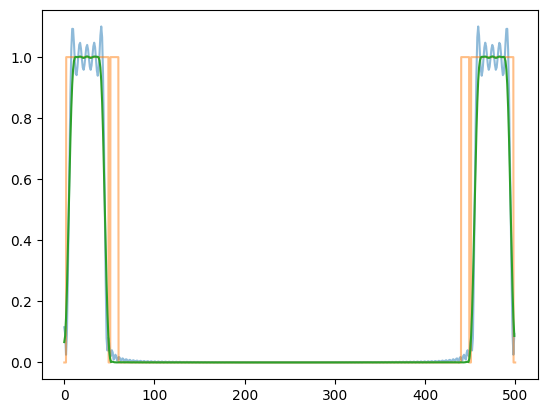

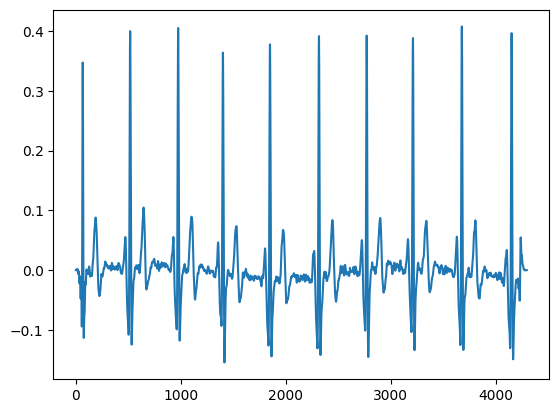

In [150]:
import scipy.signal as signal

fc=45 # frec de corte
fs=500.0 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles 
N = 512 # Numero de puntos de la FFT
BW=5 # Ancho de banda en la banda de transicion

fc1=5
fc2=45


# 1. frecuencia de corte normalizada en radianes
wc = 2*np.pi*fc/fs  

wc1=2*np.pi*fc1/fs  
wc2=2*np.pi*fc2/fs  

# 2. ancho de banda  normalizado en radianes
bwn=2*np.pi*BW/fs                      

# 3. orden estimado del filtro
M=int(4/bwn)                           
print('El orden del filtro es: ', M)

# 4. Respuesta del filtro ideal h1[n]
n = np.arange(-M,M)
print(len(n))

#===========================================
# Modificando esta expresion podrian directamente aplicar un pasa bandas

#h1 = +wc/np.pi * np.sinc(wc*(n)/np.pi) # filtro pasabajas, recuerde cambiar cuando pasaaltas, pasabanda, o rechazabanda


# Pasa bandas:
h1 = +wc2/np.pi * np.sinc(wc2*(n)/np.pi) - +wc1/np.pi * np.sinc(wc1*(n)/np.pi)


w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

plt.plot((0.5/np.pi)*fs*w1,np.abs(Hh1),alpha=0.5)
plt.plot(freq,mask, alpha=0.5)

# 5. Truncamiento de frecuencie en el origen h1[0]

# Para el caso del filtro pasbajas no se debe aplicar

# 6. Generación de la ventana para elimnar el fenomeno de Gibbs
win= signal.hamming(len(n)) 

# 7. Multiplico la respuesta ideal por la ventana
h2=h1*win 

# 8. Ganancia del filtro
A=np.sqrt(10**(0.1*Adb))

h2=h2*A # Ganancia del filtro

w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado

plt.plot((0.5/np.pi)*fs*w2,np.abs(Hh2))

plt.show()

# aplicamos a nuestra señal mediante convolución

y=np.convolve(x, h2)
t=np.linspace(0,len(y)/fs,len(y))
plt.plot(y)





In [182]:
signal.find_peaks?

#### f) Indique la formula de la ecuación en diferencias a la que responde.

Como venimos repitiendo el orden la respuesta al impulso de los filtros FIR coinside con los coeficientes de su ecuacion en diferencias

## Filtros FIR
$$\require{cancel}$$  
$$y(n)=\cancelto{0}{-\sum^{N}_{k=1}a_k y(n-k)}  +\sum^{M}_{k=0}b_k x[n-k]$$

$$y(n)=\sum^{M}_{k=0}b_k x[n-k]$$

* Diseño con fase lineal
* No recursivos los coeficientes $a_k$ de su ecuación en diferencias son 0 (No dependen de valores previos de las salida)
* Siempre son estables (no tienen retroalimentación, si la entrada se vuelve "0" eventualmente la salida irá a 0.
* Faciles de implementar (Convolución, cálculo directo)
* La respuesta al impulso coincide con el vector de coeficientes $b_k$
 
 
 otra representacion conveniente:
 $$y[n]= b_0 x(n) + b_1 x(n-1) + b_2 x(n-2) + ... + b_n x(n-M+1)$$
 
 y esto reescribirlo de manera tal que ahora nuestra letra N responda a la longitud de nuestro filtro:
 
 $$y(n)=\sum^{N-1}_{k=0}b_k x[n-k]$$
 
 
 
### Entonces esto nos dice que con la respuesta al impulso (sus coeficientes podemos reconstruir la ecuación en diferencias) el tema es que es un poco larga como para escribirla así que armemos un código para ello:

[-5.95544873e-05  8.38967186e-05  3.00794658e-04  5.31483876e-04
  7.05836166e-04  7.58901377e-04  6.49771371e-04  3.79291707e-04
  5.56684409e-19 -3.88411776e-04 -6.61646961e-04 -7.08778117e-04
 -4.75852210e-04  2.07819260e-18  5.81627676e-04  1.05799876e-03
  1.20403275e-03  8.59288555e-04  7.87595034e-18 -1.22406366e-03
 -2.50903129e-03 -3.47678159e-03 -3.79748268e-03 -3.31783473e-03
 -2.14913075e-03 -6.75837305e-04  5.32385190e-04  8.90113127e-04
  2.01742661e-18 -2.17600598e-03 -5.24409111e-03 -8.44590383e-03
 -1.08638855e-02 -1.17138927e-02 -1.06363607e-02 -7.88484120e-03
 -4.33175533e-03 -1.26281647e-03  3.60699486e-18 -1.45690814e-03
 -5.76753586e-03 -1.21238632e-02 -1.89059839e-02 -2.41022910e-02
 -2.59210129e-02 -2.34185967e-02 -1.69421276e-02 -8.21665720e-03
  3.06398284e-18  4.64569166e-03  3.29068964e-03 -4.97723234e-03
 -1.89939683e-02 -3.54940637e-02 -4.96916657e-02 -5.63706229e-02
 -5.12318572e-02 -3.21514405e-02  6.85758645e-18  4.12305361e-02
  8.50751531e-02  1.23898

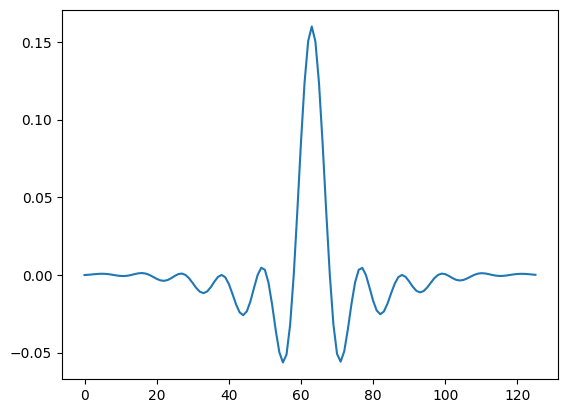

In [115]:
print(h2)
plt.plot(h2)

In [184]:
print("y[n]=",end='')

for k,b in enumerate(h2):
        
    print('+%2.8f'%b,end='')
    
    print('*x[n-'+str(k)+']',end='')




    

y[n]=+-0.00005955*x[n-0]+0.00008390*x[n-1]+0.00030079*x[n-2]+0.00053148*x[n-3]+0.00070584*x[n-4]+0.00075890*x[n-5]+0.00064977*x[n-6]+0.00037929*x[n-7]+0.00000000*x[n-8]+-0.00038841*x[n-9]+-0.00066165*x[n-10]+-0.00070878*x[n-11]+-0.00047585*x[n-12]+0.00000000*x[n-13]+0.00058163*x[n-14]+0.00105800*x[n-15]+0.00120403*x[n-16]+0.00085929*x[n-17]+0.00000000*x[n-18]+-0.00122406*x[n-19]+-0.00250903*x[n-20]+-0.00347678*x[n-21]+-0.00379748*x[n-22]+-0.00331783*x[n-23]+-0.00214913*x[n-24]+-0.00067584*x[n-25]+0.00053239*x[n-26]+0.00089011*x[n-27]+0.00000000*x[n-28]+-0.00217601*x[n-29]+-0.00524409*x[n-30]+-0.00844590*x[n-31]+-0.01086389*x[n-32]+-0.01171389*x[n-33]+-0.01063636*x[n-34]+-0.00788484*x[n-35]+-0.00433176*x[n-36]+-0.00126282*x[n-37]+0.00000000*x[n-38]+-0.00145691*x[n-39]+-0.00576754*x[n-40]+-0.01212386*x[n-41]+-0.01890598*x[n-42]+-0.02410229*x[n-43]+-0.02592101*x[n-44]+-0.02341860*x[n-45]+-0.01694213*x[n-46]+-0.00821666*x[n-47]+0.00000000*x[n-48]+0.00464569*x[n-49]+0.00329069*x[n-50]+-0.00

In [128]:
    
print("y[n]=",end='')

for k,b in enumerate(h2):
        
    print("%+10.3E" %b,end='')
    
    print('*x[n-'+str(k)+']',end='')

y[n]=-5.955E-05*x[n-0]+8.390E-05*x[n-1]+3.008E-04*x[n-2]+5.315E-04*x[n-3]+7.058E-04*x[n-4]+7.589E-04*x[n-5]+6.498E-04*x[n-6]+3.793E-04*x[n-7]+5.567E-19*x[n-8]-3.884E-04*x[n-9]-6.616E-04*x[n-10]-7.088E-04*x[n-11]-4.759E-04*x[n-12]+2.078E-18*x[n-13]+5.816E-04*x[n-14]+1.058E-03*x[n-15]+1.204E-03*x[n-16]+8.593E-04*x[n-17]+7.876E-18*x[n-18]-1.224E-03*x[n-19]-2.509E-03*x[n-20]-3.477E-03*x[n-21]-3.797E-03*x[n-22]-3.318E-03*x[n-23]-2.149E-03*x[n-24]-6.758E-04*x[n-25]+5.324E-04*x[n-26]+8.901E-04*x[n-27]+2.017E-18*x[n-28]-2.176E-03*x[n-29]-5.244E-03*x[n-30]-8.446E-03*x[n-31]-1.086E-02*x[n-32]-1.171E-02*x[n-33]-1.064E-02*x[n-34]-7.885E-03*x[n-35]-4.332E-03*x[n-36]-1.263E-03*x[n-37]+3.607E-18*x[n-38]-1.457E-03*x[n-39]-5.768E-03*x[n-40]-1.212E-02*x[n-41]-1.891E-02*x[n-42]-2.410E-02*x[n-43]-2.592E-02*x[n-44]-2.342E-02*x[n-45]-1.694E-02*x[n-46]-8.217E-03*x[n-47]+3.064E-18*x[n-48]+4.646E-03*x[n-49]+3.291E-03*x[n-50]-4.977E-03*x[n-51]-1.899E-02*x[n-52]-3.549E-02*x[n-53]-4.969E-02*x[n-54]-5.637E-02*x[n-

In [137]:
signal.firwin?

In [136]:
signal.get_window?

[-5.94130769e-05  8.36879694e-05  2.99946692e-04  5.29709348e-04
  7.03008330e-04  7.55277432e-04  6.46132557e-04  3.76848489e-04
  5.52638397e-19 -3.85282335e-04 -6.55828763e-04 -7.02066715e-04
 -4.71055777e-04  1.07843707e-18  5.75167254e-04  1.04580040e-03
  1.18971002e-03  8.48797000e-04 -4.92952335e-18 -1.20852054e-03
 -2.47671465e-03 -3.43149446e-03 -3.74759348e-03 -3.27397815e-03
 -2.12060959e-03 -6.66850448e-04  5.25304799e-04  8.78293567e-04
 -5.97216667e-18 -2.14733696e-03 -5.17542255e-03 -8.33614078e-03
 -1.07239527e-02 -1.15645547e-02 -1.05023280e-02 -7.78676316e-03
 -4.27864124e-03 -1.24757427e-03  0.00000000e+00 -1.43994222e-03
 -5.70171490e-03 -1.19884869e-02 -1.86997839e-02 -2.38459896e-02
 -2.56527816e-02 -2.31832640e-02 -1.67771672e-02 -8.13932908e-03
  3.03618577e-18  4.60518238e-03  3.26320041e-03 -4.93754553e-03
 -1.88500008e-02 -3.52395246e-02 -4.93563252e-02 -5.60148859e-02
 -5.09317532e-02 -3.19781661e-02  3.75317257e-17  4.10489430e-02
  8.47444700e-02  1.23482

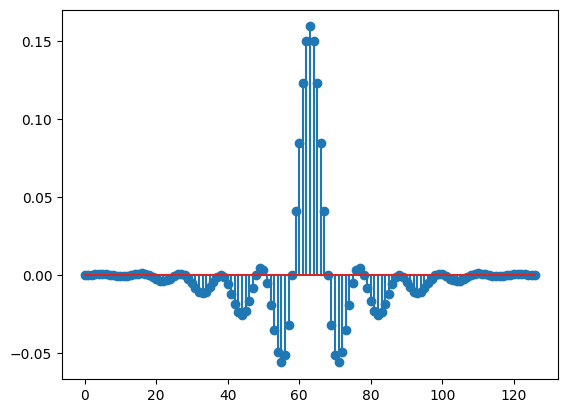

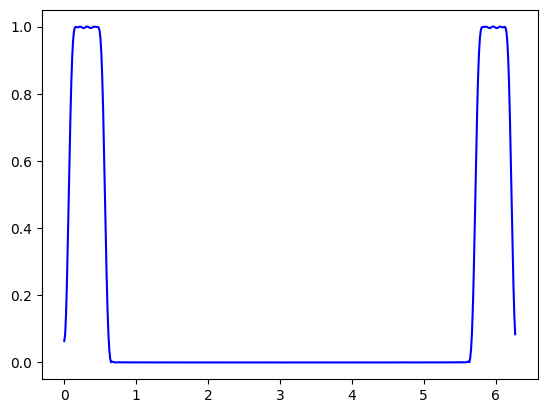

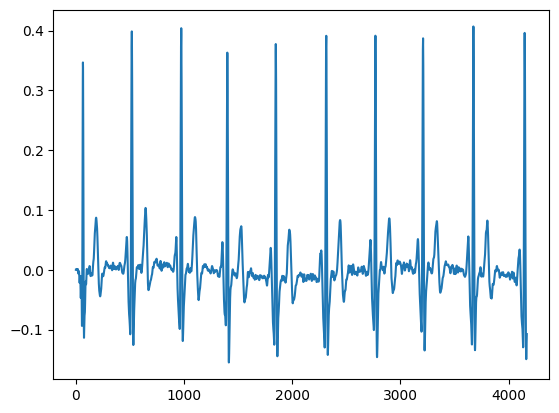

In [153]:
f1=5
f2=45
b=signal.firwin(127,[f1, f2],pass_zero=False,fs=500,window='hamming')
print(b)

plt.stem(b)
plt.show()

w, H = signal.freqz(b,whole=True,)

#plt.plot(w, 20 * np.log10(abs(H)), 'b')
plt.plot(w, abs(H), 'b')

plt.show()

xf=signal.lfilter(b,1,x)

plt.plot(xf)

plt.show()

## Ej 2: Dual-tone multi-frequency (DTMF)

DTMF es una de las maneras empleadas en los telefonos analógicos para reconocer que botones oprimía un usuario, las centrales telefonicas automaticas empleaban el procesamiento de señales para derivar llamadas o ofrecer opciones a los clientes "presiones numeral para repetir el menú".

El pad númerico se subdividia de la siguiente forma en un arreglo de 4x3 al presionar un boton se asociaban dos frecuencias como se indica en la siguiente tabla:


|            | **1209 Hz** | **1336 Hz** | **1477 Hz** |
|------------|:-----------:|:-----------:|:-----------:|
| **697 Hz** |      1      |      2      |      3      |
| **770 Hz** |      4      |      5      |      6      |
| **852 Hz** |      7      |      8      |      9      |
| **941 Hz** |      *      |      0      |      #      |

Las frecuencias presentes en la tabla son particularmente elegidas ya que las mismas son "coprimas" basicamente nos referimos a que ninguna frecuencia es multiplo de la otra para reducir la probabilidad de detectar errores debido a interferencias.

Cuando un botón se oprime sus frecuencias correspondientes se emiten por la linea. Por ejemplo si presionamos el digito 4 la señal generada sera:

$$
    x(t) = \sin(2\pi\cdot 1209\cdot t) + \sin(2\pi\cdot770\cdot t)
$$

La especificación particular del DTMF define:
The official specifications for the DTMF standard further stipulate that:

 * Cada tono debe durar al menos 65ms
 * cada digito sucesivo debe estar separado por un silencio de al menos 65ms

En este ejercicio deberá construcir un decodificador basado en la transformada de fourier

Cada tono DTMF tendrá la forma:

$$
    x[n] = \sin(2\pi\,(f_l/F_s)\, n) + \sin(2\pi\,(f_h/F_s)\,n)
$$

Donde: 

$f_l$ puede ser alguna del conjunto de "low-frecs" [697 770 852 941]

$f_h$ puede ser alguna del conjunto de "high-frecs" [1209 1336 1447]

$F_s$ será la frecuencia de muestreo que definiremos en 24000



In [289]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

Definamos una frecuenica de muestreo


In [290]:
FS=24000

La siguiente función les permitira codificar un conjunto de numeros:

In [291]:
def dtmf_dial(number):
    DTMF = {
        '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
        '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
        '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
        '*': (941, 1209), '0': (941, 1336), '#': (941, 1477),        
    }
    MARK = 0.1
    SPACE = 0.1
    n = np.arange(0, int(MARK * FS))
    x = np.array([])
    for d in number:
        s = np.sin(2*np.pi * DTMF[d][0] / FS * n) + np.sin(2*np.pi * DTMF[d][1] / FS * n) 
        x = np.concatenate((x, s, np.zeros(int(SPACE * FS))))
    return x

In [292]:
x=dtmf_dial('112')

IPython.display.Audio(x, rate=FS)

Emplee los conocimientos adquiridos para lograr indentificar las teclas oprimidas:
A continuacion brindamos indicacion o preguntas que pueden ayudarlos a encarar el ejercicio.

* a) Grafique la señal en el tiempo:
* b) Grafique el espectro de frecuencia:
* c) Puede identificar la ocurrencia de eventos de discado?
* d) Que duración aproximada tiene cada discado?
* e) Conoce alguna herramienta grafica que permita relacionar frecuencia y tiempo de ocurrencia?
* f) Puede segmentar los datos en peridos constantes?
* g) Puede genear un algoritmo que identifique un discado único ejemplo: x=dtmf_dial('4')
* h) Puede ampliar ese algoritmo para una secuencia mayor?
* i) Recuerde que medir la energía de la señal podria ser una alternativa para identificar eventos.


## Ej3: 

Genere una señal:

$$s(t)=sin(2\pi f_1t)+4.sin(2\pi f_2 t)$$

con $f_1=10 Hz$ y $f_2 = 20 Hz$ periodo de muestre $T=0.001s$ en el intervalo $t=[0.1:2) s$

* a) Calcule TDF S[k]  y grafique el espectro de magnitud y fase empleando ``plt.stem()``.
* c) Realice un zero-padding a la señal para que tenga 1000000 muestras y grafiquela superpuesta a la anterior, recuerde escalar bien las frecuencias. 
* b) Si la señal en a) está truncada por que no se observan los lobulos laterales de las componentes de frecuencia?

* d) Verifique la relación de Parseval para la TDF obenida en a):

$$E_s=\sum_{n=1}^{N}s[n]^2 = \frac{1}{N}\sum_{k=1}^{N}\left | S[k] \right |^2$$


* Modifique las frecuencias de las señales seno de forma tal que f1=10Hz y f2=10.1Hz analice los cambios en el espectro de magnitud,¿se obsevan claramente las dos frecuencias a que puede deberse? utilice zero-padding de 1000000 muestras.

* Incremente la duración de la señal hasta que pueda distinguir f1 y f2. Como justifica que incrementar la duración de la señal permita obsevar dichas frecuencias?




16149.999999999985
16149.999999999985
1900


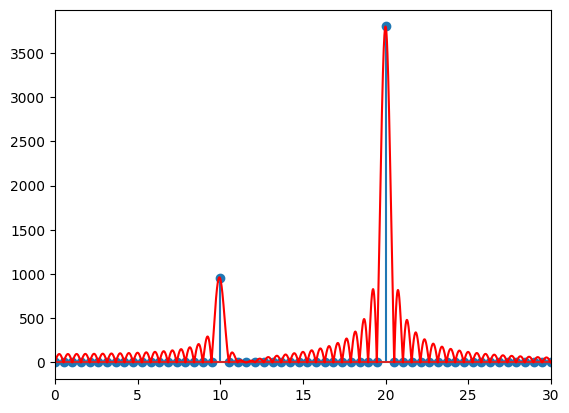

In [331]:
T=0.001
fs=1/T
t=np.arange(0.1,2,T)
f1=10
f2=20
s=np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S=np.fft.fft(s)
freq=np.linspace(0,fs,len(S))
S2=np.fft.fft(s,n=1000000)
freq2=np.linspace(0,fs,len(S2))


plt.stem(freq,abs(S))
plt.plot(freq2,abs(S2),c="r")
plt.xlim(0,30)

print(np.sum(s**2))
print(np.sum(np.abs(S)**2)/(len(S)))

print(len(s))

(9.0, 11.0)

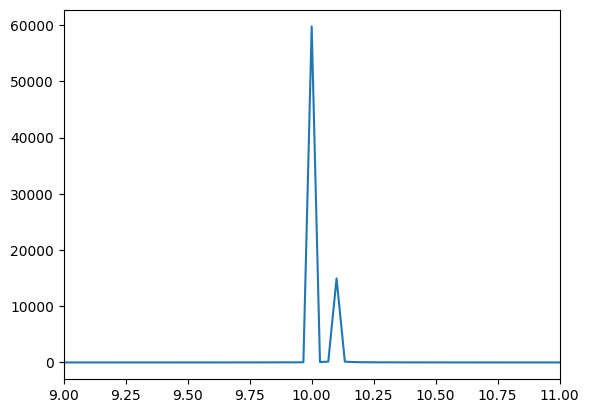

In [353]:
T=0.001
fs=1/T
t=np.arange(0.1,30,T)
f1=10.1
f2=10
s2=np.sin(2*np.pi*f1*t)+4*np.sin(2*np.pi*f2*t)

S3=np.fft.fft(s2)
freq=np.linspace(0,fs,len(S3))

plt.plot(freq,np.abs(S3))
plt.xlim(9,11)

## Ej5: Filtro de media movil

En el siguiente ejercicio se busca que, analice el archivo suministrado ``"precipitacion.txt"``, se sabe unicamene que es un registro de precipitaciónes de un equipo meteorologico diseñado por un alumno de ingeniería mecatrónica. Partiendo de la base de que los registros son correctos.

a) inspeccióne el archivo e intente subir con el comnando ``np.loadtxt()``,considere que dicho archivo quizá no responde a los argumentos por defecto. Interprete dicho archivo y grafiquelo indicando la frecuencia de muestreo.

b) Escriba la ecuación en diferencias de un filtro de media movil de logiud L=7 e indique cual es su respuesta al impulso y su respuesta en frecuenica. Que tipo de filtro es y como lo clasifica sengun su respuesta en frecuencia?. Recuerde usar tecnicas adecuadas para representar la respuesta en frecuencia con buena resolución. 

c) Diseñe las respuestas al impulso pra las longitudes L=7, 30 y 365. Filtre la señal de precipitaciónes aplicando la convolución y por que puede aplicar este filtro de esta manera. Qué indicarían las señales obtenidas?

d) Aplique un filtro de primera diferencia a la señal. Este filtro es FIR y tiene ecuación en diferencias:
$y[n]=x[n]-x[n-1]$ indique su respuesta al impulso y calcule su respuesta en frecuencia. Cómo lo clasifica sengún su respuesta en frecuencia?.

e)Filtre la señal original, con la respusta al impulso del punto d). Inspeccione la señal e indque que infomración acentua dicho filtro.





365.0


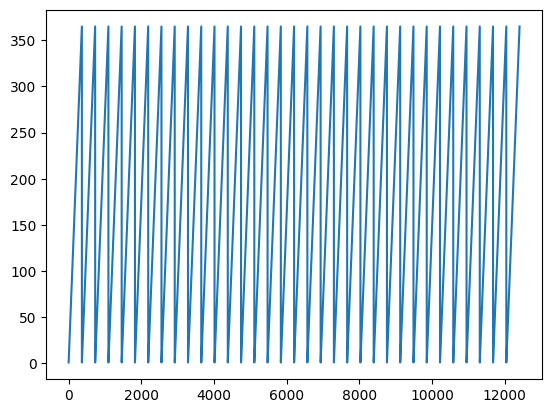

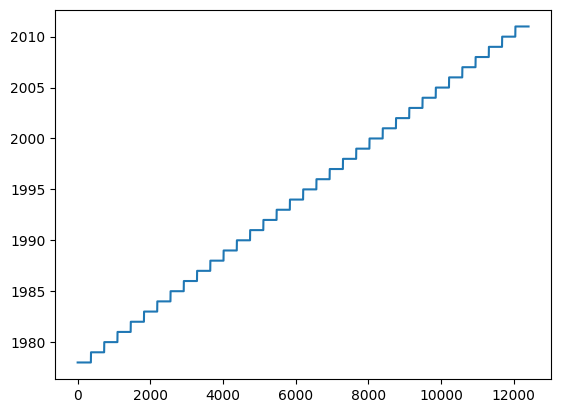

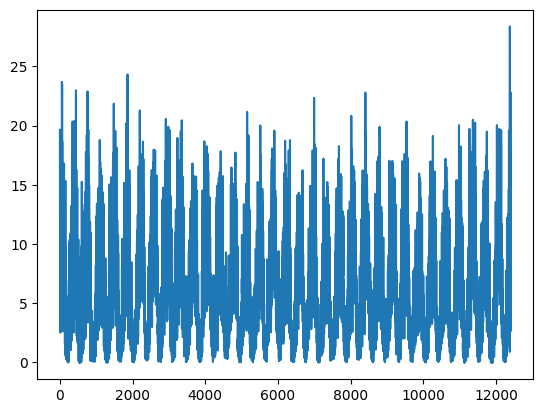

In [160]:
datos=np.loadtxt("precipitacion.txt",delimiter=",")

plt.plot(datos[:,0])
print(max(datos[:,0]))
plt.show()
plt.plot(datos[:,1])
plt.show()
plt.plot(datos[:,2])

### b) Escriba la ecuación en diferencias de un filtro de media movil de logiud L=7 e indique cual es su respuesta al impulso y su respuesta en frecuenica. Que tipo de filtro es y como lo clasifica sengun su respuesta en frecuencia?. Recuerde usar tecnicas adecuadas para representar la respuesta en frecuencia con buena resolución.

In [163]:
b7=np.ones(7)/7

print("y[n]=",end='')
for k,b in enumerate(b7):
        
    print('+%2.8f'%b,end='')
    
    print('*x[n-'+str(k)+']',end='')
    


y[n]=+0.14285714*x[n-0]+0.14285714*x[n-1]+0.14285714*x[n-2]+0.14285714*x[n-3]+0.14285714*x[n-4]+0.14285714*x[n-5]+0.14285714*x[n-6]

h[n]=[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


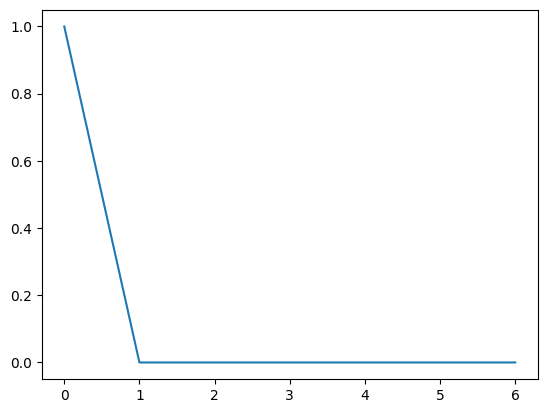

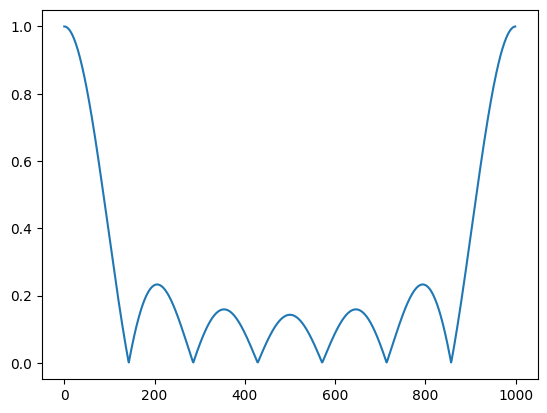

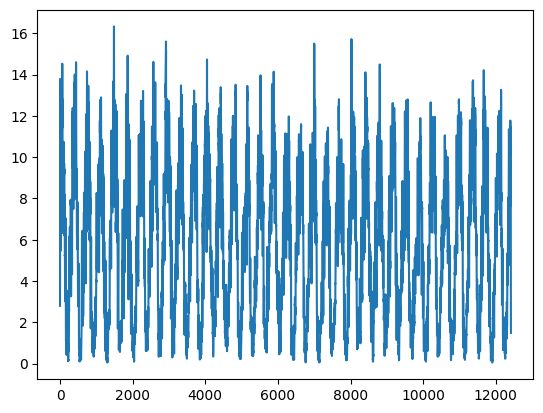

In [171]:
fs= 1 #(muestra/dia)
x=datos[:,2]
#respuesta al impulso en FIR coinside con coeficientes:

print('h[n]=',end="")
print(b7)
h7=b7

#respuesta en frecuencia TF de respuesta al impulso

H7=np.fft.fft(h7)

plt.plot(np.abs(H7)) # no se observa bien.... :/ como mejoramos?
plt.show()

H7=np.fft.fft(h7,n=1000)

plt.plot(np.abs(H7)) # no se observa bien.... :/ como mejoramos?
plt.show()

y7=np.convolve(h7,x)
plt.plot(y7)



p

## Ej6: Estudio Real

En el archivo "TP2_mecanizado.csv" dispone de un conjunto de datos que representa una estudio de esfuerzos de corte.
El mismo se efectua realizando un mecanizado con una fresa de dos cortes sobre una pieza vinculada a una celda de carga, y se registra mediante un adqusidor de datos los valores de esfuerzo en X e Y. El registro que se porporciona representa una situación en la que la herramienta ya se encuentra inmersa en el material.

**Se plantea que estudie los datos adquiridos:**

Cargue los datos y grafique:
* Señal completa, y encuadre 3 periodos de la forma de onda.

Identifique:
* Frecuencia de muestreo, analizando el archivo suministrado

En base a la información suministrada:
* Tome las primeras 200 muestras y ejecute un analisis espectral, determine la frecuencia fundamental de ensayo y con ella determine que velocidad rotación la herramienta en (RPM).
* Repita ahora tomando las primeras 800 , luego 4000 y finalmente la señal completa. ¿que velocidades obtiene en cada caso?a que se deben estas diferencias y como podria explicarlo?

Para pensar:
* Podria estimar el porcenaje de imersión de la herramienta, analizando la forma de onda de un perido de rotación de la herramienta. (entiendase por porcentaje de inmersión de la herramienta)

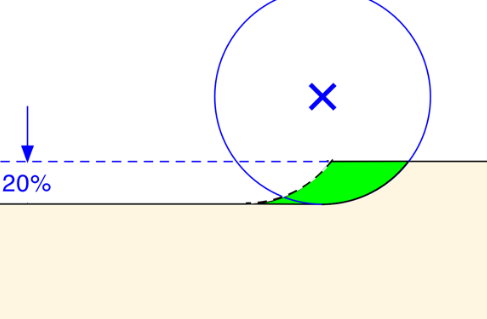

Cacule la repuesta al impulso del sistema descripto por el siguientes diagrama de bloques.

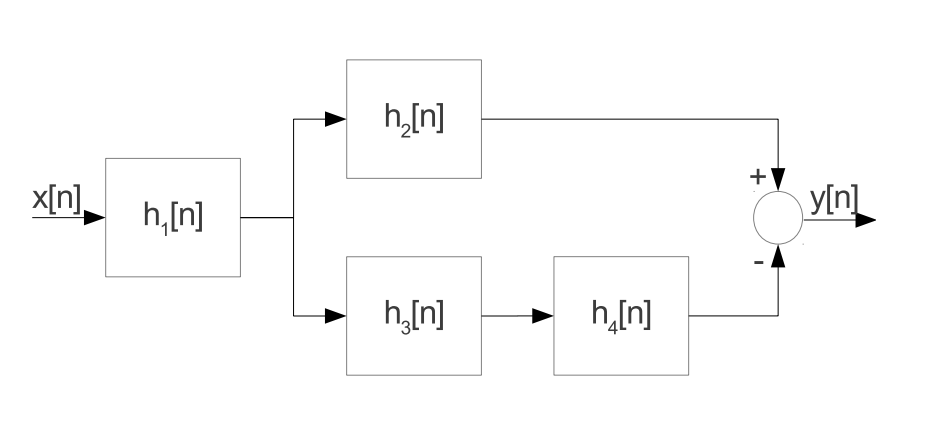

considerando la respuesta al impulso de los bloques separados

$h_1[n]=3(-1)^n (\dfrac{1}{4})^n u[n-2]$

$h_2[n]=h_3[n]=u[n+2]$

$h4[n]=\delta[n-1]$



El operador $T$ representa un sistema linal e invariante en el tiempo como muestra los siguientes diagramas si la entrada del sistema es $\left(\dfrac{1}{3}\right)^n u[n]$ la salida es $g[n]$ si la entrada es $x[n]$ la salida es $y[n]$


$$f(n)=\left(\dfrac{1}{3}\right)^n u[n] \rightarrow \fbox{T\{.\}} \rightarrow g(n)$$

$$x(n)\rightarrow \fbox{T\{.\}} \rightarrow y(n)$$


Exprese $y[n]$ en función de $g[n]$ y $x[n]$


Recuerde:

$G(e^{j\omega})=H(e^{j\omega})F(e^{j\omega})$

$$a^{n}u[n]  \rightarrow Fourier \rightarrow \dfrac{1}{1-ae^{-j\omega}} $$

$$aF(e^{j\omega})  \rightarrow Fourier^{-1} \rightarrow af(n) $$
$$e^{j\omega n_d}F(e^{j\omega})  \rightarrow Fourier^{-1} \rightarrow f(n-n_d) $$



In [65]:
from mat4py import loadmat
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sps
%matplotlib inline

In [212]:
data=loadmat("ecg.mat")

array([ 0.45617899,  0.42832697,  0.39055694, ..., -0.09082583,
       -0.08186996, -0.07825327])

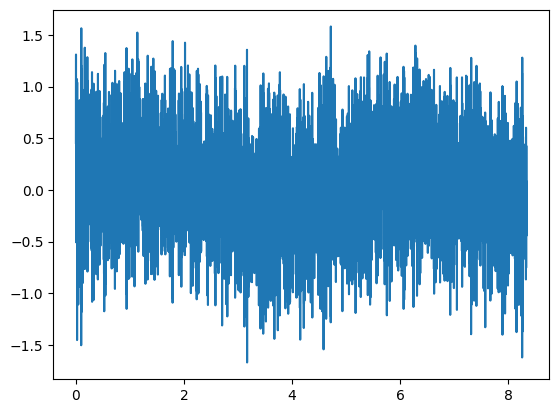

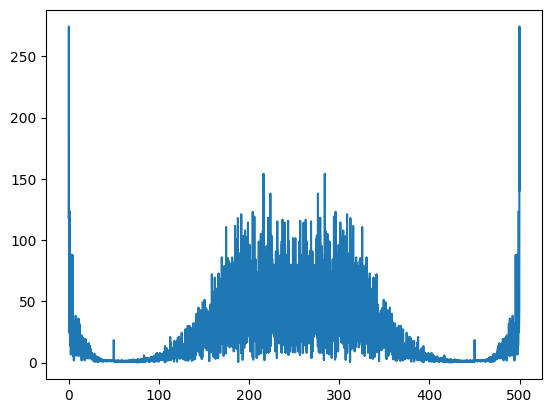

In [239]:
ecg=data['ecg']
ecg=np.asarray(ecg)
ecg=np.asarray(ecg.reshape(1,-1))
ecg=ecg[0]
ecg

fs=500
t=np.linspace(0,len(ecg)/fs,len(ecg))


noise = 3*np.random.random(size=len(ecg))
noise=noise-np.mean(noise)

b, a = sps.butter(2, 150, 'high', analog=False,fs=500)

noise_f=sps.filtfilt(b,a,noise)

    
    

ecgnoise=ecg+noise_f

ecg=ecgnoise

plt.plot(t,ecg)
plt.show()

ECG=np.fft.fft(ecg)
freq=np.linspace(0,fs,len(ecg))

plt.plot(freq,np.abs(ECG))
#plt.xscale('log')
#plt.xlim(0,60)
plt.show()

In [240]:
len(ecg)/fs

8.34

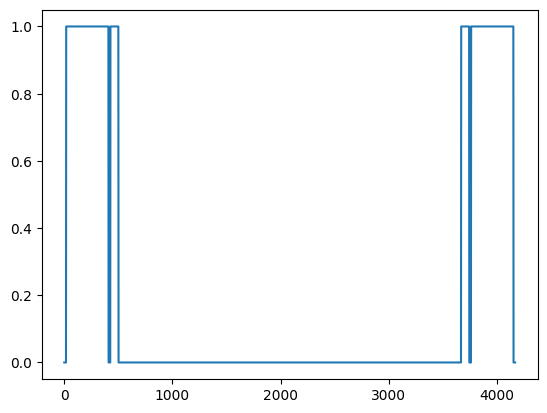

In [241]:
mask=np.ones(len(ecg))
#filtrado 50Hz
mask[np.where((freq>49) & (freq<51))]=0
mask[np.where((freq>500-51) & (freq<500-49))]=0

#filtrado de baja frecuencia:
f_low=2
mask[np.where((freq<f_low))]=0
mask[np.where((freq>500-f_low))]=0

#filtrado lowpass
f_low_pass=60
mask[np.where((freq>f_low_pass) & (freq<500-f_low_pass))]=0

plt.plot(mask)
plt.show()

#filtrado lowpass

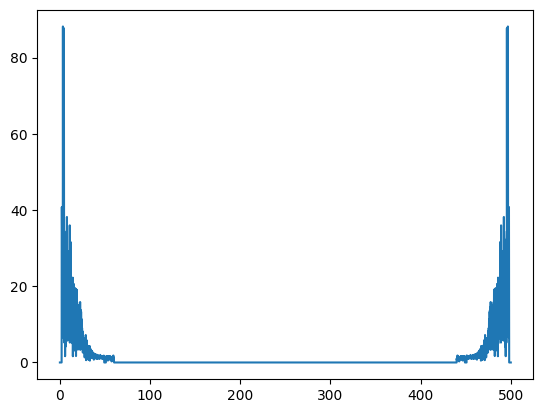

In [242]:
plt.plot(freq,np.abs(ECG)*mask)
#plt.xlim(0,100)
plt.show()

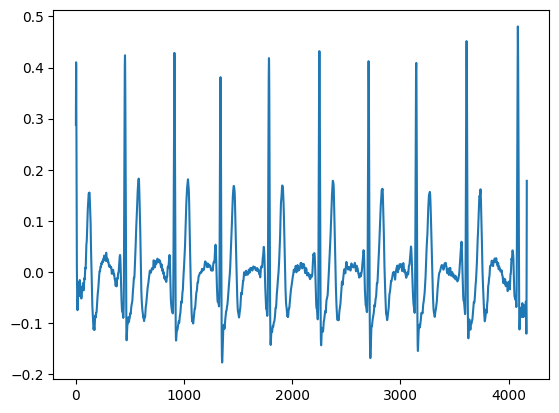

In [238]:
ecgf=np.fft.ifft(ECG*mask)

plt.plot(np.real(ecgf))
plt.show()


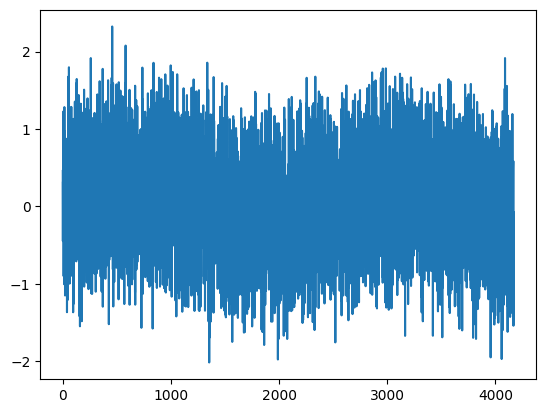

In [222]:
plt.plot(ecgnoise)
plt.show()

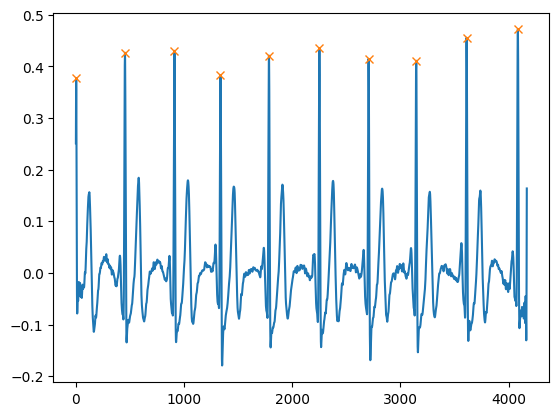

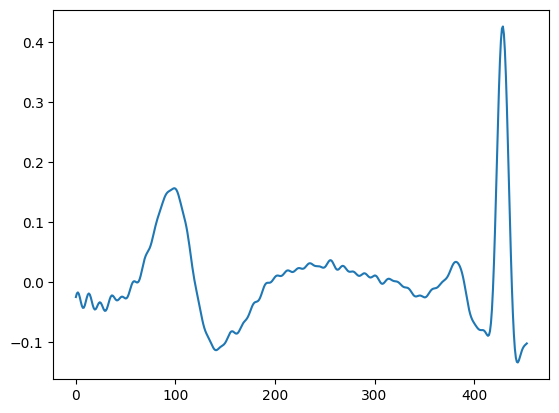

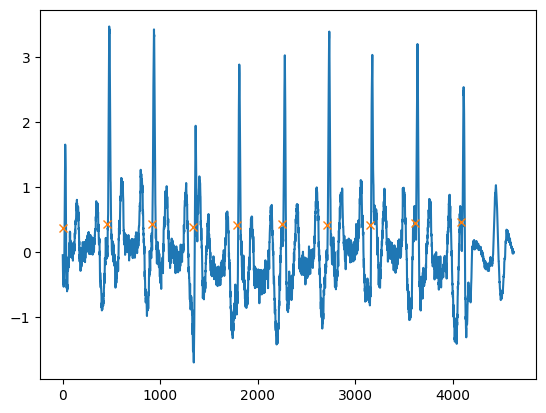

In [195]:
peaks, _ = sps.find_peaks(np.real(ecgf),height=0.3)
ecgf=np.real(ecgf)
samples_betwen=np.diff(peaks)
plt.plot(ecgf)
plt.plot(peaks, ecgf[peaks], "x")
plt.show()
samples_betwen.mean()

template=ecgf[25:454+25]
plt.plot(template)
#template=template-template.mean()
plt.show()
#np.correlate()

correlation=np.correlate(ecgnoise,template,mode="full")
plt.plot(correlation)
plt.plot(peaks, ecgf[peaks], "x")
plt.show()


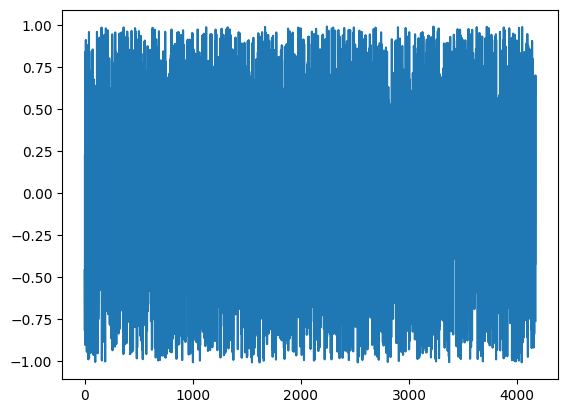

In [191]:
plt.plot(noise)
#plt.plot(np.abs(np.fft.fft(noise)))
plt.show()

In [168]:
plt.plot(ecgnoise)

NameError: name 'n' is not defined

In [244]:
np.savetxt("noisy_ecg.txt",ecgnoise)

In [245]:
datos=np.loadtxt("noisy_ecg.txt")

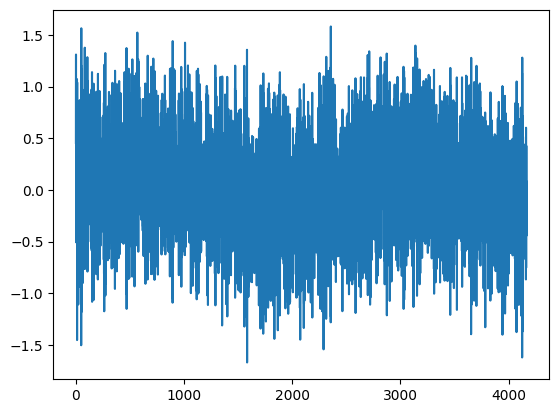

In [246]:
plt.plot(datos)